In [1]:
# this file doesnt have any footnotes bc this one was me jsut messing around near the beginning. I still kept it 
# because i might need some of the code for later


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
# from statsmodels.tsa.stattools import grangercausalitytests

In [2]:
all_data = False

In [3]:
sloans_df = pd.read_csv("FGCCSLA.csv", header=0, parse_dates=['DATE'])
sloans_df = sloans_df.set_index('DATE')

C:\Miniconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


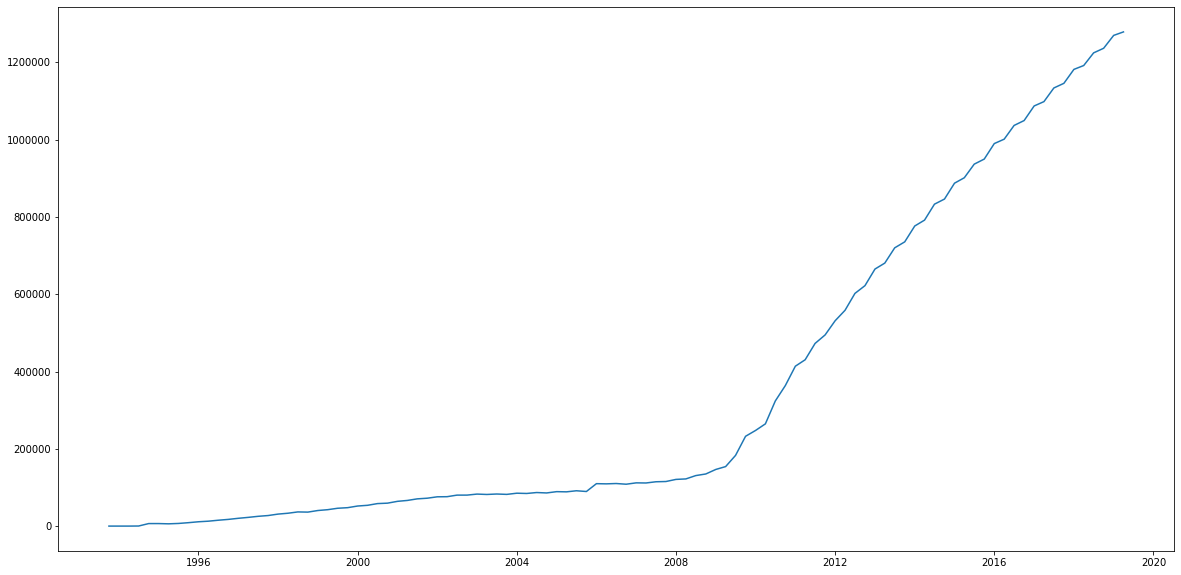

In [4]:
plt.figure(figsize=(20,10))
plt.plot(sloans_df.index, sloans_df.values)
plt.show()

In [5]:
if not all_data:
    sloans_df = sloans_df[(sloans_df.index.year == 2008) | (sloans_df.index.year >= 2017)]
#     sloans_df = sloans_df[sloans_df.index.year >= 2017]
sloans_df.head()

,FGCCSLA
DATE,
2008-01-01,121100.0
2008-04-01,122355.0
2008-07-01,131000.0
2008-10-01,135152.0
2017-01-01,1087035.0


In [6]:
gdp_df = pd.read_csv("GDP.csv", header=0, parse_dates=['DATE'])
gdp_df = gdp_df.set_index('DATE')

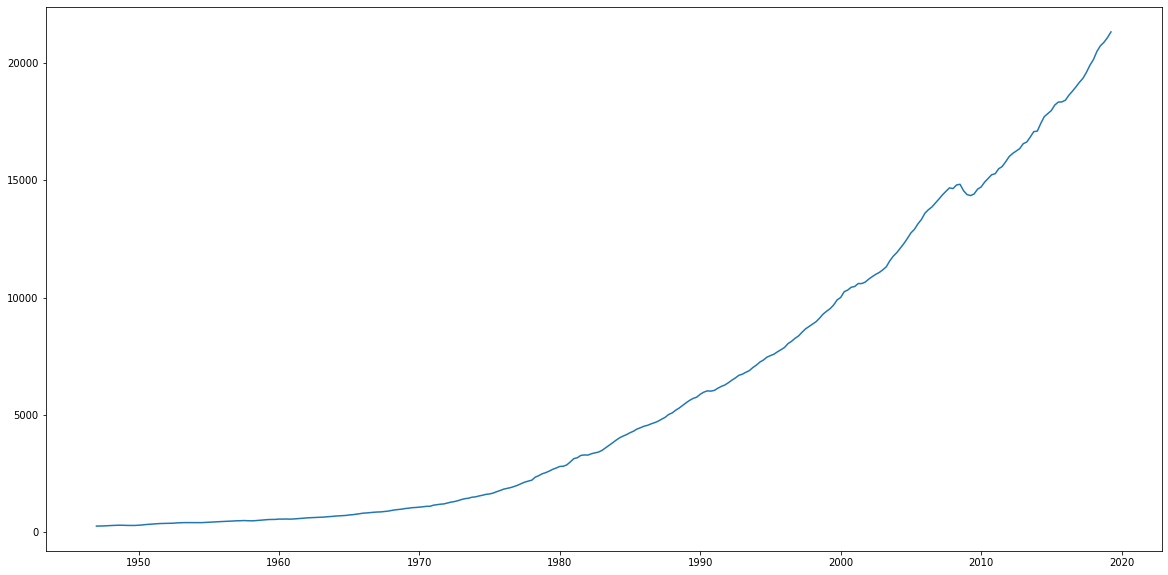

In [7]:
plt.figure(figsize=(20,10))
plt.plot(gdp_df.index, gdp_df.values)
plt.show()

In [8]:
gdp_df.head()

,GDP
DATE,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742


In [9]:
if not all_data:
    gdp_df = gdp_df[(gdp_df.index.year == 2008) | (gdp_df.index.year >= 2017)]
#     gdp_df = gdp_df[gdp_df.index.year >= 2017]

else:
    gdp_df = gdp_df[gdp_df.index >= sloans_df.index[0]]

In [10]:
gdp_df.head()

,GDP
DATE,
2008-01-01,14651.039
2008-04-01,14805.611
2008-07-01,14835.187
2008-10-01,14559.543
2017-01-01,19190.431


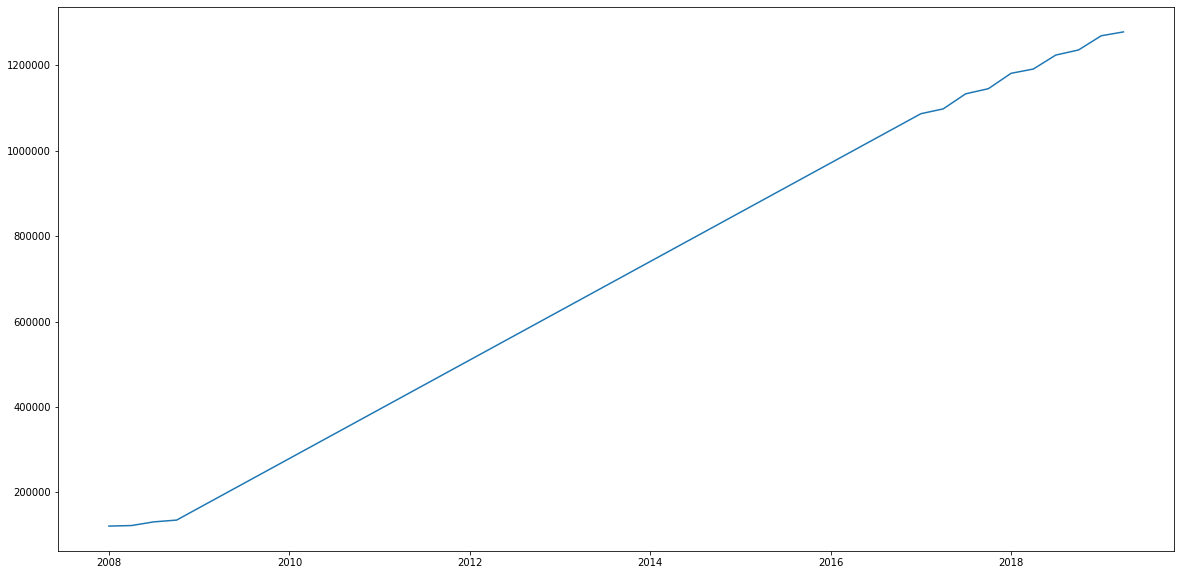

In [11]:
plt.figure(figsize=(20,10))
plt.plot(sloans_df.index, sloans_df.values)
plt.show()

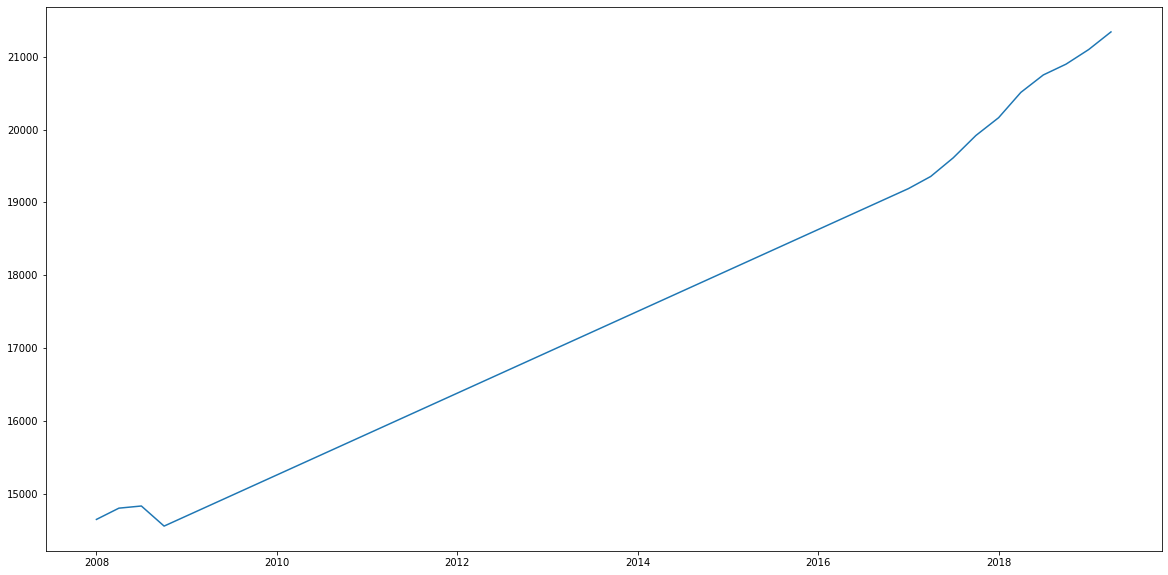

In [12]:
plt.figure(figsize=(20,10))
plt.plot(gdp_df.index, gdp_df.values)
plt.show()

In [13]:
# calculate covariance matrix
covariance = np.cov(sloans_df.iloc[:,0], gdp_df.iloc[:,0])[0][1]

In [14]:
print(covariance)

1329488566.4908242


In [15]:
correlation = covariance / (sloans_df.iloc[:,0].std() * gdp_df.iloc[:,0].std())

In [16]:
print(correlation)

0.9921220051836589


In [17]:
#data = pd.concat([gdp_df, sloans_df], axis=1).values
# grangercausalitytests(data, 8, addconst=True, verbose=True)

In [18]:
r, p = pearsonr(sloans_df, gdp_df)

significance_level = 0.05

In [19]:
print(f"Pearson's R: {r[0]}")
print(f"P value: {p[0]}")

Pearson's R: 0.9921220051836588
P value: 3.3934641816873194e-12


In [20]:
if p <= significance_level:
    print("The correlation is significant.")
else:
    print("The correlation is NOT significant.")

The correlation is significant.


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
X = sloans_df.values
Y = gdp_df.values

In [23]:
model = LinearRegression().fit(X, Y)

In [24]:
r_sq = model.score(X, Y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.984306073169644


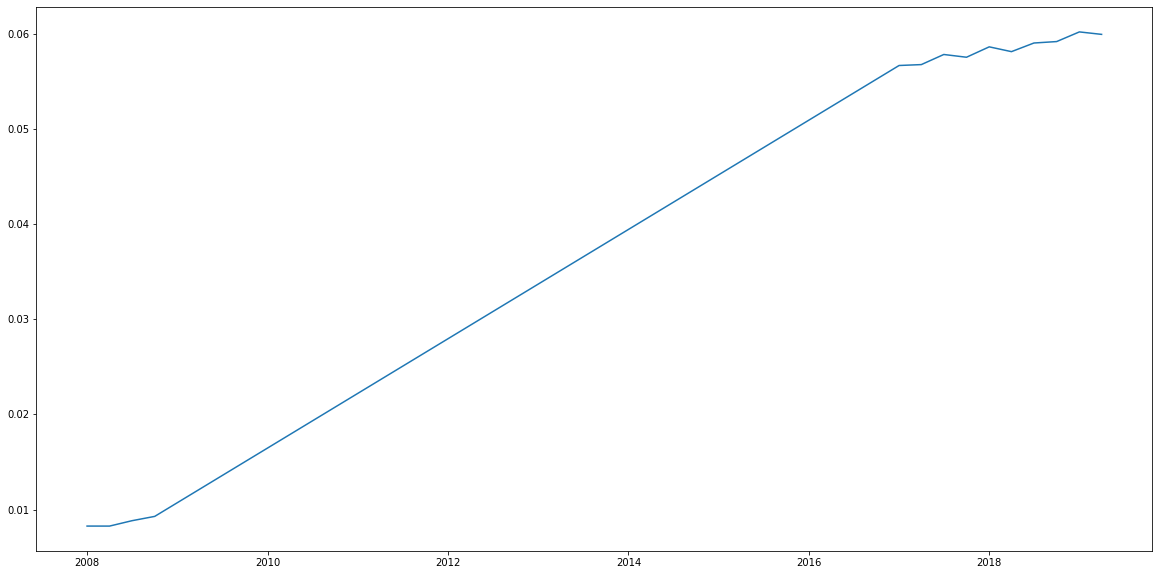

In [25]:
plt.figure(figsize=(20,10))
plt.plot(sloans_df.index, (sloans_df.values / 1000) / gdp_df.values)
plt.show()